In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

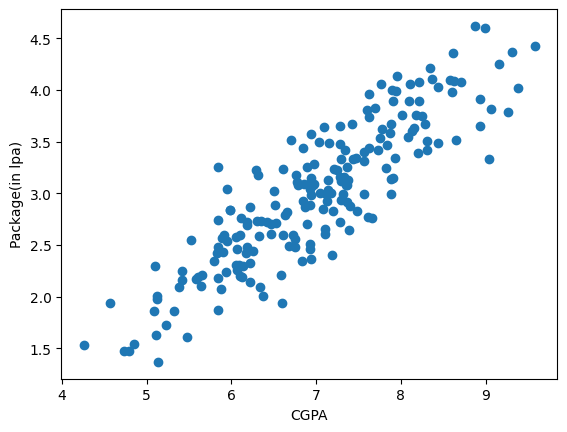

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

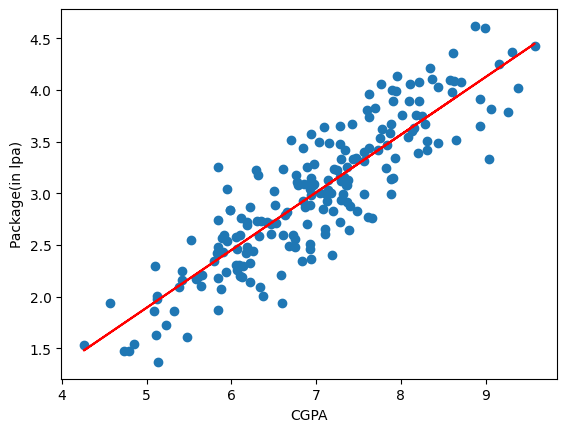

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
y_pred = lr.predict(X_test)

In [14]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [15]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [16]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [17]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [18]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [19]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [20]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [21]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.536478,3.26
1,5.12,0.763592,1.98
2,7.82,0.708678,3.25
3,7.42,0.890402,3.67
4,6.94,0.535985,3.57


Text(0, 0.5, 'Package(in lpa)')

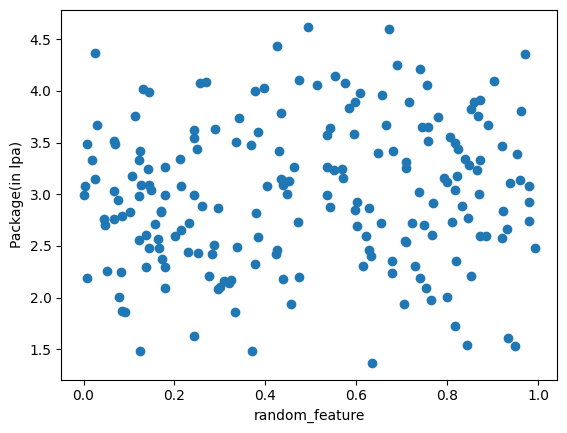

In [22]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [23]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test)

In [28]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7817074415334988


In [29]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7699078437785528

In [30]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [31]:
new_df2.sample(5)

,cgpa,iq,package
66,5.11,0.83,1.63
82,5.58,1.47,2.17
33,6.35,1.63,2.73
123,5.10,1.70,2.30
54,6.86,2.79,3.09


Text(0, 0.5, 'Package(in lpa)')

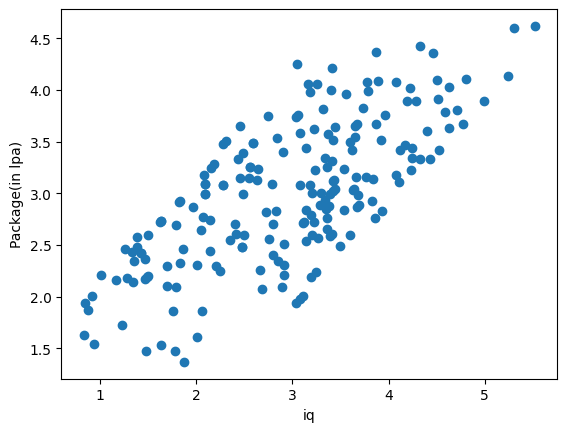

In [32]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [33]:
np.random.randint(-100,100)

44

In [34]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [37]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8009270860214208


In [38]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7901663879685247

# MAE vs MSE: Outliers ke saath comparison

Dekhte hain ki MAE (Mean Absolute Error) outliers ke against robust kyun hai aur MSE (Mean Squared Error) kyun nahi hai.

In [39]:
# Simple example se samjhate hain
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Normal predictions aur actual values
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.1, 2.2, 2.8, 4.1, 5.2])

print("Normal data ke saath:")
print(f"MAE: {mean_absolute_error(y_true, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_true, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")

# Ab outlier add karte hain
y_true_outlier = np.array([1, 2, 3, 4, 15])  # 5 ki jagah 15 (outlier)
y_pred_outlier = np.array([1.1, 2.2, 2.8, 4.1, 5.2])  # prediction same hai

print("\nOutlier ke saath:")
print(f"MAE: {mean_absolute_error(y_true_outlier, y_pred_outlier):.3f}")
print(f"MSE: {mean_squared_error(y_true_outlier, y_pred_outlier):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_true_outlier, y_pred_outlier)):.3f}")

Normal data ke saath:
MAE: 0.160
MSE: 0.028
RMSE: 0.167

Outlier ke saath:
MAE: 2.080
MSE: 19.228
RMSE: 4.385


## Kyun hua aisa?

**MAE formula:** |y_true - y_pred| ka mean  
**MSE formula:** (y_true - y_pred)² ka mean

Jab outlier aata hai:
- MAE mein sirf absolute difference calculate hota hai
- MSE mein error square hota hai, toh large errors ka impact exponentially badh jata hai

Example: Error = 10
- MAE contribution = |10| = 10
- MSE contribution = 10² = 100

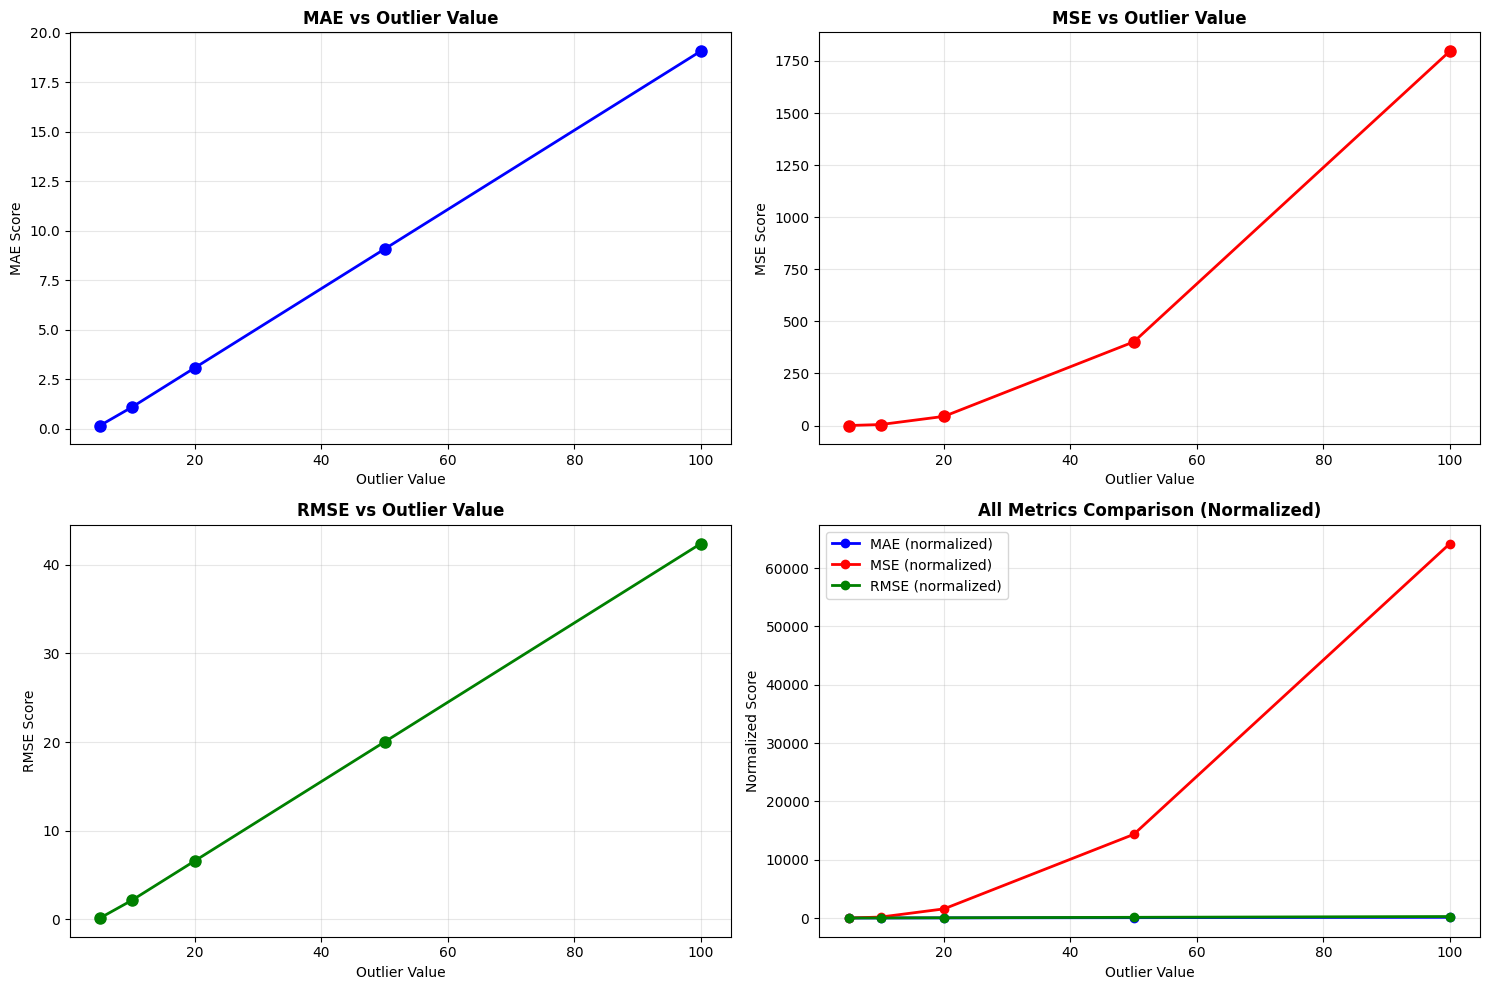


Outlier Impact Analysis:
Outlier Value   MAE        MSE             RMSE      
5               0.160      0.028           0.167     
10              1.080      4.628           2.151     
20              3.080      43.828          6.620     
50              9.080      401.428         20.036    
100             19.080     1797.428        42.396    


In [40]:
# Comprehensive visualization banate hain
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Different levels of outliers test karte hain
outlier_values = [5, 10, 20, 50, 100]
mae_scores = []
mse_scores = []
rmse_scores = []

# Base data
y_true_base = np.array([1, 2, 3, 4, 5])
y_pred_base = np.array([1.1, 2.2, 2.8, 4.1, 5.2])

for outlier in outlier_values:
    y_true_temp = y_true_base.copy()
    y_true_temp[-1] = outlier  # Last value ko outlier banate hain
    
    mae = mean_absolute_error(y_true_temp, y_pred_base)
    mse = mean_squared_error(y_true_temp, y_pred_base)
    rmse = np.sqrt(mse)
    
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Plot 1: MAE vs Outlier value
axes[0,0].plot(outlier_values, mae_scores, 'bo-', linewidth=2, markersize=8)
axes[0,0].set_title('MAE vs Outlier Value', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Outlier Value')
axes[0,0].set_ylabel('MAE Score')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: MSE vs Outlier value
axes[0,1].plot(outlier_values, mse_scores, 'ro-', linewidth=2, markersize=8)
axes[0,1].set_title('MSE vs Outlier Value', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Outlier Value')
axes[0,1].set_ylabel('MSE Score')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: RMSE vs Outlier value
axes[1,0].plot(outlier_values, rmse_scores, 'go-', linewidth=2, markersize=8)
axes[1,0].set_title('RMSE vs Outlier Value', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Outlier Value')
axes[1,0].set_ylabel('RMSE Score')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: All metrics comparison (normalized)
# Normalize karte hain comparison ke liye
mae_norm = np.array(mae_scores) / mae_scores[0]
mse_norm = np.array(mse_scores) / mse_scores[0]
rmse_norm = np.array(rmse_scores) / rmse_scores[0]

axes[1,1].plot(outlier_values, mae_norm, 'bo-', label='MAE (normalized)', linewidth=2)
axes[1,1].plot(outlier_values, mse_norm, 'ro-', label='MSE (normalized)', linewidth=2)
axes[1,1].plot(outlier_values, rmse_norm, 'go-', label='RMSE (normalized)', linewidth=2)
axes[1,1].set_title('All Metrics Comparison (Normalized)', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Outlier Value')
axes[1,1].set_ylabel('Normalized Score')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Data table bhi dikhate hain
print("\nOutlier Impact Analysis:")
print("=" * 50)
print(f"{'Outlier Value':<15} {'MAE':<10} {'MSE':<15} {'RMSE':<10}")
print("=" * 50)
for i, outlier in enumerate(outlier_values):
    print(f"{outlier:<15} {mae_scores[i]:<10.3f} {mse_scores[i]:<15.3f} {rmse_scores[i]:<10.3f}")